# Pdfmatcher
### by Robin

# Challenge
<img src="img/pdf-file-format-symbol.png" alt="Drawing" style="width: 50px;"/>

### -help annotaters by clustering similar pdfs
### -identify duplicates

# Approach

## - Text clustering
## - Layout mapping
## - Image analysis


# Text clustering

In [58]:
import glob
import pandas as pd
import os

In [59]:
filelist = glob.glob("data/*.tsv")
print(filelist)
df = pd.read_csv('data/in.tsv',header=None,sep="\t")
labels = pd.read_csv('data/expected-original.tsv',header=None,sep="\t")

['data/expected-original.tsv', 'data/in.tsv', 'data/test.tsv']


In [61]:
labels

,0
0,address__post_town=OLDHAM address__postcode=OL...
1,address__post_town=GAINSBOROUGH address__postc...
2,address__post_town=STAINES-UPON-THAMES[11] add...
3,address__post_town=LONDON address__postcode=W1...
4,address__post_town=NOTTINGHAM address__postcod...
...,...
1724,address__post_town=OLDHAM address__postcode=OL...
1725,address__post_town=BROADWAY address__postcode=...
1726,address__post_town=LONDON address__postcode=NW...
1727,address__post_town=LONDON address__postcode=N4...


In [62]:
regex = "(charity_number=)(\d*)"
ylabels = labels[0].str.extract(regex)
labels = ylabels[1]
labels

0       1156398
1       1165525
2        271547
3       1076235
4        702321
         ...   
1724    1156398
1725     326446
1726    1111593
1727    1079575
1728    1164704
Name: 1, Length: 1729, dtype: object

In [63]:
#Check for NAs
df.isna().sum()

0     0
1     0
2    45
3     1
4     1
5     0
dtype: int64

In [64]:
df = df.iloc[:,[0,5]]

In [65]:
df.columns = ['filename','text']

In [66]:
#Removes line breaks
df = df.replace(r'\\n',' ', regex=True) 

In [67]:
import nltk
from nltk.corpus import treebank
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 

In [68]:
def preprocessor(text):
    #convert to lowercase
    #tokenize words
    words = nltk.word_tokenize(text)
    words = [w.lower() for w in words]
    #remove stopwords
    stop_words = stopwords.words('english')
    words = [word for word in words if word not in stop_words]
    words = [x for x in words if len(x) > 3]
    #remove punctuation
    words=[word.lower() for word in words if word.isalpha()]
    lemmatizer = WordNetLemmatizer()
    words =[lemmatizer.lemmatize(w) for w in words]
    return words

In [69]:
from nltk import ngrams

def ngrammer(text, n=3):
    tmp=[]
    textngrams = ngrams(text.split(), n)
    for grams in textngrams:
        words = tmp.append(grams)
        
    return words

In [70]:
#Apply preprocessing steps
df['preprocess'] = df['text'].apply(lambda x : preprocessor(x))

In [12]:
#df['ngrams'] = df['preprocess'].apply(lambda x : ngrammer(''.join(x)))

In [71]:
#Convert to list of strings
docs = df.text.apply(''.join)

In [15]:
'''
#instantiate CountVectorizer() 
cv=CountVectorizer() 
 
# this steps generates word counts for the words in your docs 
word_count_vector=cv.fit_transform(docs)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(word_count_vector)# print idf values 

df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

# count matrix 
count_vector=cv.transform(docs) 
 
# tf-idf scores 
tf_idf_vector=tfidf_transformer.transform(count_vector)

feature_names = cv.get_feature_names() 
 
#get tfidf vector for first document 
first_document_vector=tf_idf_vector[0] 
 
#print the scores 
df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
df.sort_values(by=["tfidf"],ascending=False)
'''

'#instantiate CountVectorizer() \ncv=CountVectorizer() \n \n# this steps generates word counts for the words in your docs \nword_count_vector=cv.fit_transform(docs)\n\ntfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) \ntfidf_transformer.fit(word_count_vector)# print idf values \n\ndf_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) \n \n# sort ascending \ndf_idf.sort_values(by=[\'idf_weights\'])\n\n# count matrix \ncount_vector=cv.transform(docs) \n \n# tf-idf scores \ntf_idf_vector=tfidf_transformer.transform(count_vector)\n\nfeature_names = cv.get_feature_names() \n \n#get tfidf vector for first document \nfirst_document_vector=tf_idf_vector[0] \n \n#print the scores \ndf = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) \ndf.sort_values(by=["tfidf"],ascending=False)\n'

In [74]:
'''
#Shorter way
from sklearn.feature_extraction.text import TfidfVectorizer 
 
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True, min_df=0.01) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(docs)
'''

# TfidfVectorizer

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidfvec(docs):
    tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.8, max_features=200000,
                                 min_df=0.01)
    # just send in all your docs here
    fitted_vectorizer=tfidf_vectorizer.fit(docs)
    tfidf_vectorizer_vectors=fitted_vectorizer.transform(docs)
    X = tfidf_vectorizer_vectors
    print(tfidf_vectorizer_vectors.shape)
    return X

In [105]:
X = tfidfvec(docs)


(1729, 10408)


In [137]:
X[1709]

<1x10408 sparse matrix of type '<class 'numpy.float64'>'
	with 1459 stored elements in Compressed Sparse Row format>

In [106]:
pairwise_similarity = X * X.T 

In [117]:
pairwise_similarity[1]

<1x1729 sparse matrix of type '<class 'numpy.float64'>'
	with 1729 stored elements in Compressed Sparse Row format>

In [112]:
density = X.getnnz() / np.prod(X.shape)
density

0.1002656674204876

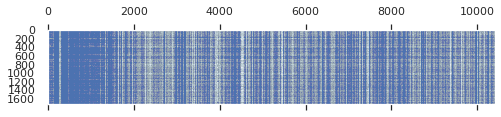

In [143]:
plt.spy(X, markersize=0.1)

In [121]:
A = sparse.random(100,100, density=0.01)
plt.spy(A, markersize=4)

NameError: name 'sparse' is not defined

In [139]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    ax = fig.add_subplot(111, facecolor='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

In [108]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(pairwise_similarity)

ValueError: Must pass 2-d input. shape=()

In [29]:
#experient with changing paramters in tfidf

min_df = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.12,0.14,0.16, 0.18, 0.2]
max_df = 

result=[]
for i in min_df:
    tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.8, max_features=200000,
                                 min_df=i)
    # just send in all your docs here
    fitted_vectorizer=tfidf_vectorizer.fit(docs)
    tfidf_vectorizer_vectors=fitted_vectorizer.transform(docs)
    shape = tfidf_vectorizer_vectors.shape
    print(i, shape)


0 (1729, 144539)
0.01 (1729, 10408)
0.02 (1729, 7323)
0.03 (1729, 5945)
0.04 (1729, 5098)
0.05 (1729, 4581)
0.06 (1729, 4191)
0.07 (1729, 3899)
0.08 (1729, 3661)
0.09 (1729, 3432)
0.1 (1729, 3247)
0.12 (1729, 2926)
0.14 (1729, 2364)
0.16 (1729, 1939)
0.18 (1729, 1656)
0.2 (1729, 1450)


# HashingVectorizer

In [ ]:
hashvectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       alternate_sign=False, norm='l2')

In [39]:
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import sys
from time import time

km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=10,
                verbose=1)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
km.predict(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()



Clustering sparse data with KMeans(max_iter=100, n_clusters=10, verbose=1)
Initialization complete
Iteration 0, inertia 2465.745380244158
Iteration 1, inertia 1393.058528465908
Iteration 2, inertia 1379.383768577733
Iteration 3, inertia 1374.9984116550354
Iteration 4, inertia 1372.2303556286633
Iteration 5, inertia 1368.9193749839071
Iteration 6, inertia 1367.0256808446256
Iteration 7, inertia 1366.0606796019626
Iteration 8, inertia 1365.7473558068182
Iteration 9, inertia 1365.6536761607938
Iteration 10, inertia 1365.5681993643088
Iteration 11, inertia 1365.502701348869
Iteration 12, inertia 1365.422614345096
Iteration 13, inertia 1365.3390623347716
Iteration 14, inertia 1365.271169300686
Iteration 15, inertia 1365.2264926897742
Iteration 16, inertia 1365.2141941173459
Iteration 17, inertia 1365.1996038187285
Iteration 18, inertia 1365.1117475543613
Iteration 19, inertia 1365.0691982834385
Iteration 20, inertia 1365.0636733684887
Converged at iteration 20: strict convergence.
Initializ

Iteration 8, inertia 1360.2356909278597
Iteration 9, inertia 1360.1362231974329
Iteration 10, inertia 1360.083859820155
Iteration 11, inertia 1360.0416624253742
Iteration 12, inertia 1360.0142113146517
Iteration 13, inertia 1360.0036777902515
Iteration 14, inertia 1359.9948804723151
Iteration 15, inertia 1359.9890190246454
Iteration 16, inertia 1359.9848722449517
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 2546.7796207443444
Iteration 1, inertia 1381.2501141033347
Iteration 2, inertia 1367.522013213116
Iteration 3, inertia 1364.3828325147138
Iteration 4, inertia 1362.848082909247
Iteration 5, inertia 1362.3490912364987
Iteration 6, inertia 1361.8826030203118
Iteration 7, inertia 1361.5647111034555
Iteration 8, inertia 1361.364350730796
Iteration 9, inertia 1361.199746704516
Iteration 10, inertia 1361.0741479427995
Iteration 11, inertia 1361.0020347989155
Iteration 12, inertia 1360.9366279920123
Iteration 13, inertia 1360.7190877859798
Ite

/home/becode/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/becode/.local/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/becode/.local/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


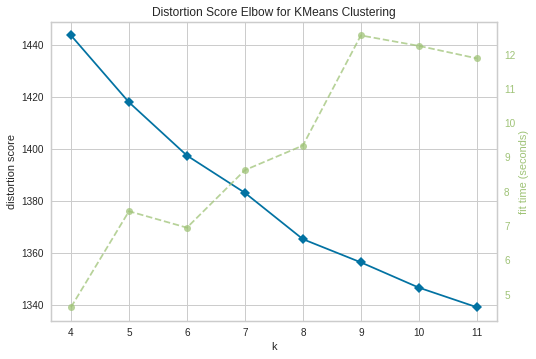

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [82]:
dir(visualizer)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_ax',
 '_check_n_features',
 '_fig',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_size',
 '_validate_data',
 '_wrapped',
 'ax',
 'axes',
 'color',
 'draw',
 'elbow_score_',
 'elbow_value_',
 'estimator',
 'fig',
 'finalize',
 'fit',
 'force_model',
 'get_params',
 'is_fitted',
 'k_scores_',
 'k_timers_',
 'k_values_',
 'knee_value',
 'kneedle',
 'locate_elbow',
 'metric',
 'name',
 'poof',
 'score',
 'scoring_metric',
 'set_params',
 'set_title',
 'show',
 'size',
 'timings',
 'title']

In [89]:
visualizer.k_value

AttributeError: 'KMeans' object has no attribute 'k_value'

In [42]:
X_new = km.fit_transform(X)

Initialization complete
Iteration 0, inertia 2494.667650502895
Iteration 1, inertia 1390.539485246563
Iteration 2, inertia 1376.7998175027792
Iteration 3, inertia 1372.5699341802956
Iteration 4, inertia 1370.4440327438615
Iteration 5, inertia 1369.247207736083
Iteration 6, inertia 1368.5400439157554
Iteration 7, inertia 1368.0252792224621
Iteration 8, inertia 1367.5440700094487
Iteration 9, inertia 1367.0249739826202
Iteration 10, inertia 1366.6211158185586
Iteration 11, inertia 1366.3249919404689
Iteration 12, inertia 1366.1287425035378
Iteration 13, inertia 1365.7900281181476
Iteration 14, inertia 1365.4200418297423
Iteration 15, inertia 1365.2063366437385
Iteration 16, inertia 1365.0673551549212
Iteration 17, inertia 1364.9453791071433
Iteration 18, inertia 1364.775178847103
Iteration 19, inertia 1364.709191725006
Iteration 20, inertia 1364.64737398419
Iteration 21, inertia 1364.612879365588
Iteration 22, inertia 1364.5947518309217
Iteration 23, inertia 1364.5850236259514
Converged 

Iteration 26, inertia 1356.5119942367942
Iteration 27, inertia 1354.8995099386502
Iteration 28, inertia 1351.1071681401481
Iteration 29, inertia 1349.3286418172468
Iteration 30, inertia 1348.9503459430662
Iteration 31, inertia 1348.912017169323
Iteration 32, inertia 1348.9065097421478
Converged at iteration 32: strict convergence.


In [48]:
y_kmeans = km.predict(X)

In [47]:
X_pred

array([9, 7, 1, ..., 9, 5, 6], dtype=int32)

In [44]:
X_new[:,0]

array([1.10232743, 1.07247086, 1.04598569, ..., 1.08039447, 1.04319894,
       1.0186354 ])

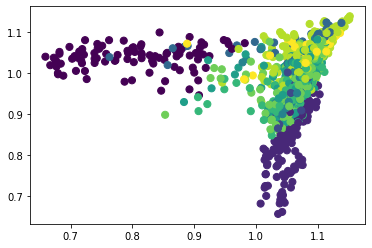

In [51]:
import matplotlib.pyplot as plt
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_kmeans, s=50, cmap='viridis')


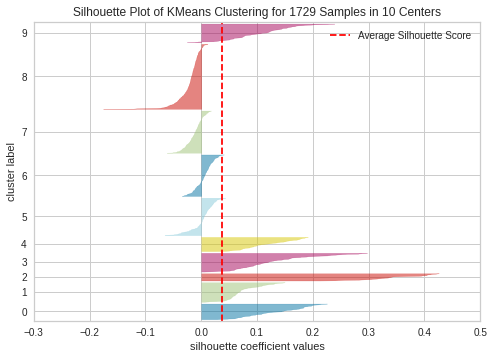

/home/becode/.local/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1729 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', model=None)

In [95]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import silhouette_visualizer
from yellowbrick.datasets import load_credit

# Use the quick method and immediately show the figure
silhouette_visualizer(km, X, colors='yellowbrick')

In [102]:
import sklearn.preprocessing as pp

def cosine_similarities(X):
    #X_norm = pp.normalize(X.tocsc(), axis=0)
    return X.T * X

In [103]:
X_cos = cosine_similarities(X)

In [101]:
type(X_cos)

scipy.sparse.csr.csr_matrix

In [38]:
len(labels)
labels.fillna('Nonumber', inplace=True)
labels.isna().sum()

0

In [33]:
len(km.labels_)

1729

In [23]:
from sklearn.metrics.pairwise import cosine_similarity

X = cosine_similarity(tfidf_vectorizer_vectors)



<class 'numpy.ndarray'>


In [26]:
tfidf_vectorizer_vectors.shape


(1729, 7323)

In [27]:
X.shape

(1729, 1729)

In [28]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=5, metric='cosine')
cos = neigh.fit(tfidf_vectorizer_vectors)

In [31]:
cos

NearestNeighbors(metric='cosine')

In [ ]:
def max_n(row_data, row_indices, n):
        i = row_data.argsort()[-n:]
        # i = row_data.argpartition(-n)[-n:]
        top_values = row_data[i]
        top_indices = row_indices[i]  # do the sparse indices matter?

        return top_values, top_indices, i

In [ ]:
# Create a tool and make it public

In [91]:
from pyclustering.cluster.dbscan import dbscan
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES
# Sample for cluster analysis.
#sample = read_sample(FCPS_SAMPLES.SAMPLE_CHAINLINK)
# Create DBSCAN algorithm.
dbscan_instance = dbscan(X, 0.2, 10)
# Start processing by DBSCAN.
dbscan_instance.process()
# Obtain results of clustering.
clusters = dbscan_instance.get_clusters()
noise = dbscan_instance.get_noise()
# Visualize clustering results
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X)
visualizer.append_cluster(noise, X, marker='x')
visualizer.show()

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

In [150]:
from sklearn.cluster import DBSCAN


dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 ... -1 -1 -1]


ValueError: 'c' argument has 1729 elements, which is inconsistent with 'x' and 'y' with size 1.

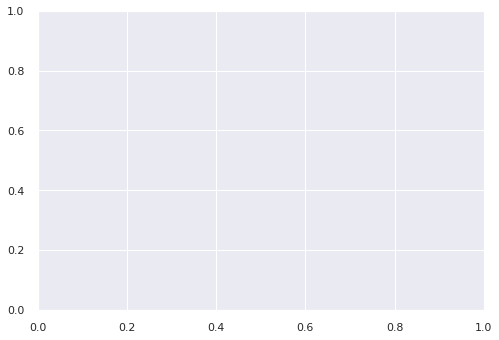

In [155]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = .5, min_samples = 5)

clusters = dbscan.fit_predict(X)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap=mglearn.cm2, s=60)

In [158]:
X[0,:]

<1x10408 sparse matrix of type '<class 'numpy.float64'>'
	with 429 stored elements in Compressed Sparse Row format>

In [ ]:
X_fit

In [148]:
dir(X_fit)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [57]:
docs

0       TAR 1 August 2016 Trustees' Annual Report for ...
1        ; Na {if anv) { oA el C 3 QIC [1€d C f (S ' R...
2       54 S ke * B   Welcome to our Annual Report for...
3       Annual Repor t 8 Accounts 2017/18 Year ended 3...
4       The Greenway Centre (Registered charity, numbe...
                              ...                        
1724    TAR 1 August 2016 Trustees' Annual Report for ...
1725    The Gordon Russell Trust Charity No. 326446 Tr...
1726    Charity No (if any) 1111593 Period start date ...
1727    CASPARI FOUNDATION (Company Number 3815700) (R...
1728    REGISTERED COMPANY NUMBER: 09623674 (England a...
Name: text, Length: 1729, dtype: object